In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg

In [3]:
df_test_under = pd.read_csv("data/resampled_data.csv")

# Time series

From the above plot on anomaly count, it is evident that moteid 6 and 18 having higer anomaly count, hence considering any one sensor for further processing

In [ ]:

start = pd.to_datetime("2004-02-28")
df_filtered_18 = df_test_under[(df_test_under['moteid'] == 18) & (df_test_under['date'] == "2004-02-28" )]
df_filtered_18 = df_filtered_18.sort_values(by=['timestamp'])
df_filtered_18['hour'] = df_filtered_18['timestamp'].dt.hour

Finding AutoCorrelation

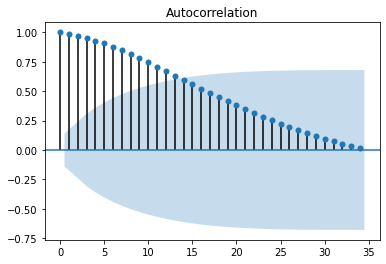

In [ ]:
plot = plot_acf(df_filtered_18.temperature.values,lags=34)

creating and evaluating a static autoregressive model

In [ ]:

train = df_filtered_18.temperature.values

# train autoregression
model = AutoReg(np.asarray(train), lags=20)
model_fit = model.fit()

# make predictions for next day (i.e) 2004-02-29
predictions = model_fit.predict()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Passing the predicted value to above supervised learning model to identify the anomaly

In [ ]:
future_pred = clf_stk.predict(predictions.reshape(-1,1))

EVALUATION of the predicted data

In [ ]:
df_filtered = df_test_under[(df_test_under['moteid'] == 18) & (df_test_under['date']== "2004-02-29" )]

In [ ]:
test_predict = df_filtered.anomaly.values[:178]

In [ ]:
print("testing value",test_predict)

testing value [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
print("predicted value",future_pred)

predicted value [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
print(confusion_matrix(test_predict,future_pred))

[[ 1 54]
 [42 81]]


There are some False Positives and True Negatives but the supervised learning model was able to identify the anomaly with the forecasted data.

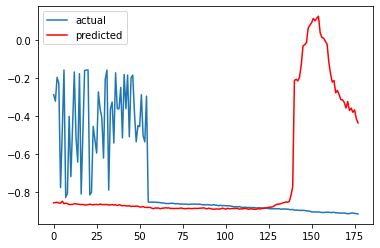

In [ ]:
plt.plot(df_filtered.temperature.values[:178],label='actual')
plt.plot(predictions, color='red',label='predicted')
plt.legend()
plt.show()